# Author: Priya Gupta

Task-2: Prediction using Unsupervised ML

Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [42]:
#Importing required libraries for the task
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

# Reading the Datasets

In [43]:
#Importing the data from given iris 
df = pd.read_csv('Iris.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [44]:
print(df.head()) #loads the first 5 rows

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [45]:
print(df.tail()) #loads the last 5 rows

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [46]:
#Data Summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
#Printing total no. of rows and column
df.shape

(150, 6)

In [48]:
#Checking for NaN values i.e undefined value
print(df.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# Visualization

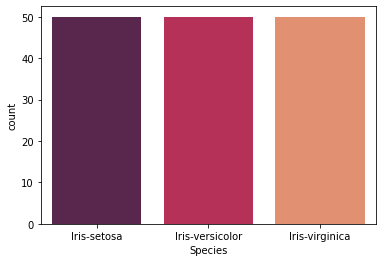

In [49]:
#Visualizing the species count
sns.countplot(df['Species'], palette='rocket')

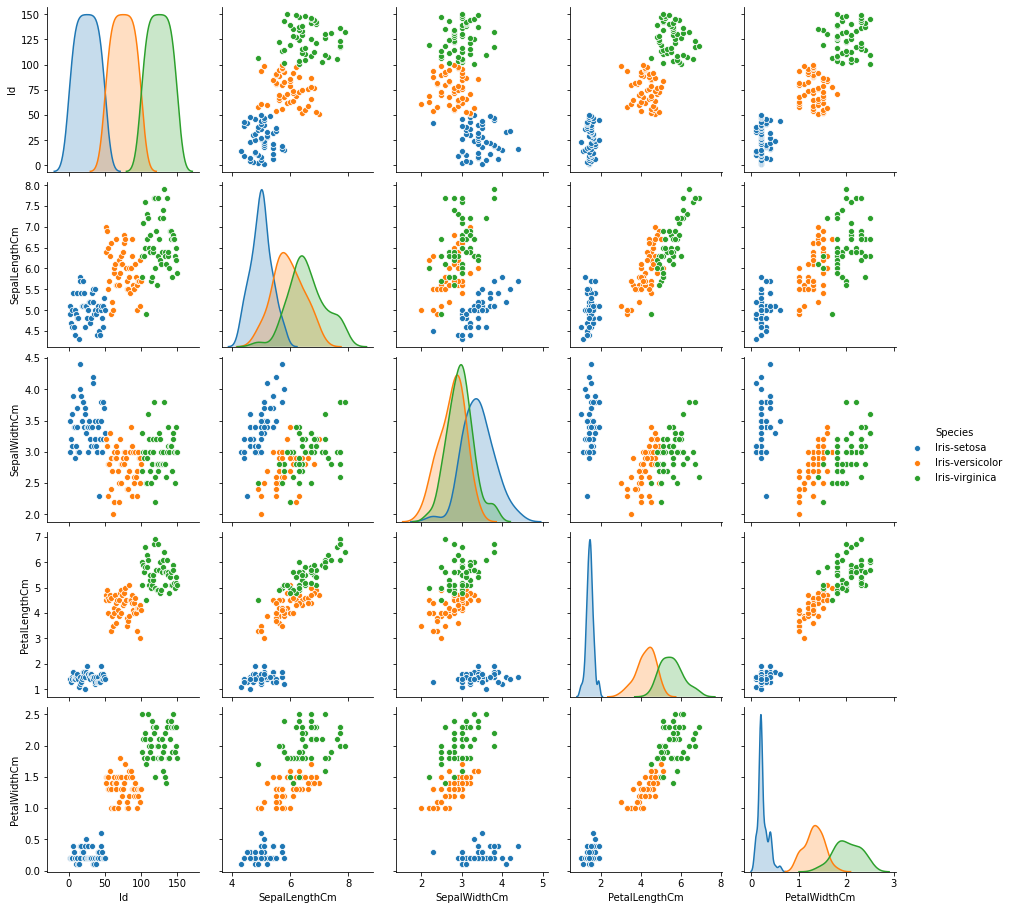

In [50]:
#Showing relations with sepal and petal parameters
sns.pairplot(data = df, hue = 'Species')

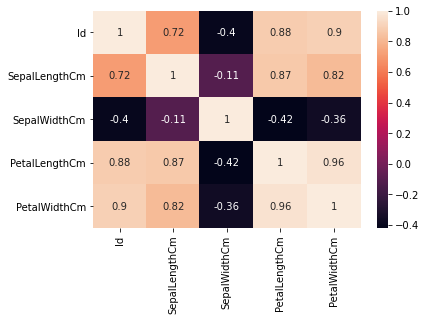

In [51]:
#Finding correlation between data
sns.heatmap(df.corr(), annot = True)
plt.show()

# Finding optimum no. of the Clusters for K-Means

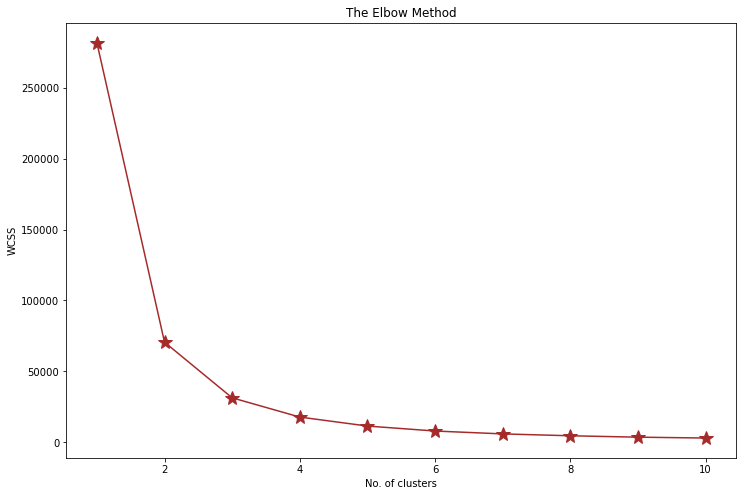

In [52]:
#Using elbow method to find optimal no. of clusters
plt.figure(figsize=(12,8))
x=df.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='*',color = "brown", markersize=15)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means Classifier

In [53]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

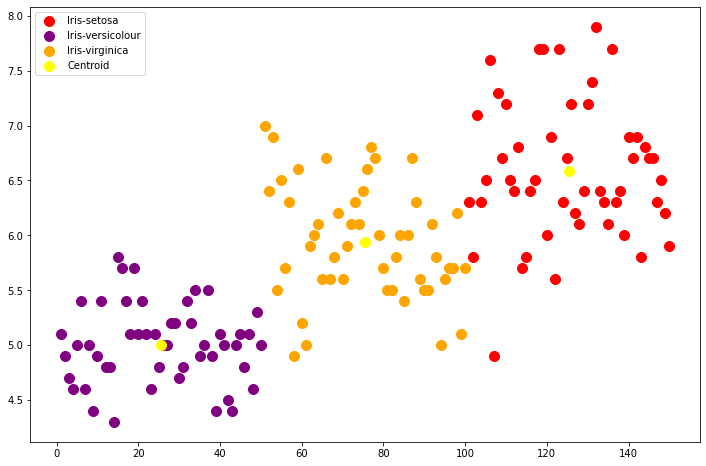

In [54]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')

plt.legend()
plt.show()

# Thank You!